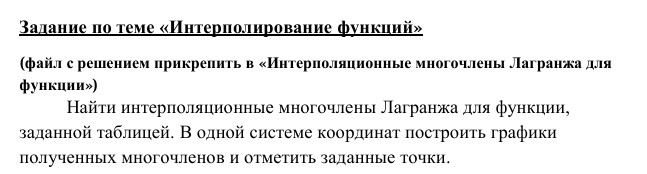

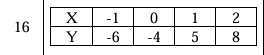

Для начала представим таблично заданную функцию в виде массивов:

In [6]:
X = [-1, 0, 1, 2]
Y = [-6, -4, 5, 8]

Далее при помощи этих двух формул найдем полином:

1. 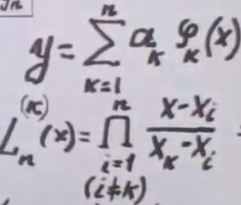

In [10]:
import sympy as sp

# Генерирует sympy вид полинома
def create_part_polynom(X, Y):
    x = sp.Symbol('x')

    x_sy = [sp.Float(v, 15) for v in X]
    y_sy = [sp.Float(v, 15) for v in Y]

    L = 0
    n = len(x_sy)

    t = x_sy[1] + x_sy[2]

    # Цикл базисных членов
    for k in range(n):
        L_k = 1 # Ведем подсчет базисных членов
        for j in range(n):
            if j != k:
                L_k *= (x - x_sy[j]) / (x_sy[k] - x_sy[j]) # Перемножение предыдущего произведения на новый базисный член
            
        L += y_sy[k] * sp.simplify(L_k) # Создание полинома
    return sp.expand(L)
        
print(f'Полином Лагранжа имеет вид:\ny={create_part_polynom(X, Y)}')

Полином Лагранжа имеет вид:
y=-2.16666666666667*x**3 + 3.5*x**2 + 7.66666666666667*x - 4.0


Построим график полинома Лагранжа и отметим точки:

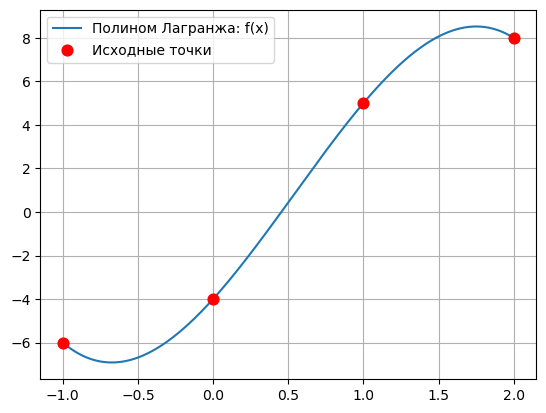

In [14]:
import matplotlib.pyplot as plt
import numpy as np

f = lambda x: -2.16666666666667 * x ** 3 + 3.5 * x ** 2 + 7.66666666666667 * x - 4.0

# ==== Строим график полинома Лагранжа ====
array_x = np.linspace(-1, 2, 1000)
y = [f(x_i) for x_i in array_x]

x_points = np.array([-1, 0, 1, 2])
y_points = np.array([-6, -4, 5, 8])

plt.plot(array_x, y, label="Полином Лагранжа: f(x)")
plt.scatter(x_points, y_points, color='red', s=60, zorder=5, label="Исходные точки")
plt.legend()
plt.grid(True)
plt.show()